In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error


# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)


In [4]:
dataset.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [6]:
dataset

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
136,472
137,535
138,622
139,606


In [ ]:
min(dataset.Passengers)

104

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))

In [6]:
dataset = scaler.fit_transform(dataset)

In [7]:
dataset[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [8]:
len(dataset)

141

In [9]:
training_size = 100
train, test = dataset[0:training_size, :] , dataset[training_size:len(dataset),:] #dataset[0:100, :] , dataset[100:141,:]

In [10]:
train.shape

(100, 1)

In [11]:
test.shape

(41, 1)

In [ ]:
train[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [ ]:
test.shape

(41, 1)

In [ ]:
test[:5]

array([[0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058]])

In [12]:
import numpy as np
def create_x_y(data,look_back):
  x_data, y_data = [],[]
  for i in range(len(data) - look_back - 1):
    iv = data[i:(i+look_back),0]
    dv = data[i + look_back,0]
    x_data.append(iv)
    y_data.append(dv)
  x_data = np.array(x_data)
  y_data = np.array(y_data)
  return x_data,y_data


In [13]:
x_train,y_train = create_x_y(train,1)

In [14]:
x_test,y_test = create_x_y(test,1)

In [ ]:
# sequestial models usually take data interms of 3d array

In [15]:
x_train.shape

(98, 1)

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0], 1, x_train.shape[1]))

In [17]:
x_train.shape

(98, 1, 1)

In [18]:
x_test.shape

(39, 1)

In [19]:
x_test = np.reshape(x_test,(x_test.shape[0], 1, x_test.shape[1]))

In [20]:
x_test.shape

(39, 1, 1)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential() #brain without neurons

In [23]:
from tensorflow.keras.layers import LSTM,Dense

In [24]:
look_back = 1

In [25]:
x_train.shape

(98, 1, 1)

In [26]:
model.add(LSTM(4, input_shape = (1, look_back), return_sequences=True))
model.add(LSTM(4,return_sequences=True))
model.add(LSTM(4))

model.add(Dense(1))


In [27]:
model.compile(loss = 'mean_squared_error', optimizer = "adam")

In [30]:
(98 // 2) * 100

4900

In [31]:
model.fit(x_train,y_train, epochs = 100, batch_size = 2)

Epoch 1/100
49/49 [==============================] - 9s 6ms/step - loss: 0.0536
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0311
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 4/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0181
Epoch 5/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 6/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 7/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 8/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 9/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 10/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0137
Epoch 11/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 12/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 13/100
49/49 [=================

In [32]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 7ms/step


In [33]:
y_pred[:5]

array([[0.4650802 ],
       [0.5628489 ],
       [0.61536676],
       [0.61762697],
       [0.5385357 ]], dtype=float32)

In [34]:
ypred = scaler.inverse_transform(y_pred)

In [35]:
ypred[:5]

array([[344.91156],
       [395.55576],
       [422.75998],
       [423.9308 ],
       [382.96152]], dtype=float32)

In [36]:
y_test[:5]

array([0.61389961, 0.6969112 , 0.7007722 , 0.57915058, 0.46911197])

In [37]:
ytest = scaler.inverse_transform([y_test])

In [38]:
ytest

array([[422., 465., 467., 404., 347., 305., 336., 340., 318., 362., 348.,
        363., 435., 491., 505., 404., 359., 310., 337., 360., 342., 406.,
        396., 420., 472., 548., 559., 463., 407., 362., 405., 417., 391.,
        419., 461., 472., 535., 622., 606.]])

In [ ]:
ypred[:5]

array([[355.38275],
       [408.71985],
       [438.35043],
       [439.6446 ],
       [395.25842]], dtype=float32)

In [39]:
import matplotlib.pyplot as plt

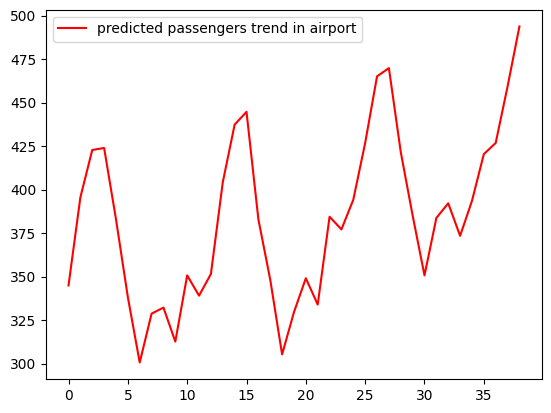

In [42]:
plt.plot(ypred, c = 'r',label = "predicted passengers trend in airport")
plt.legend()

In [ ]:
ytest.shape

(1, 39)

In [43]:
ytest.T.shape

(39, 1)

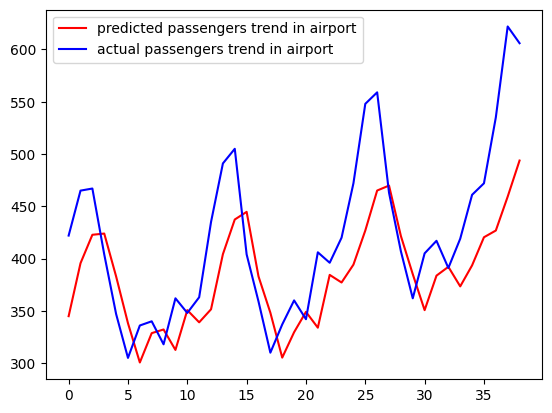

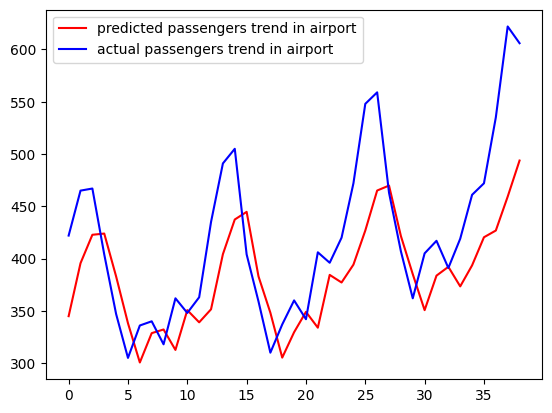

In [46]:
plt.plot(ypred, c = 'r',label = "predicted passengers trend in airport")
plt.plot(ytest.T, c = 'b',label = "actual passengers trend in airport")
plt.legend()


In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest.T,ypred)

49.41996882512019

In [ ]:
ypred.shape

(39, 1)

In [ ]:
ytest.shape


(1, 39)